In [62]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 86s 0us/step


In [7]:
data_dir

'.\\datasets\\flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [2]:
# list(data_dir.glob('*/*.jpg'))

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [11]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

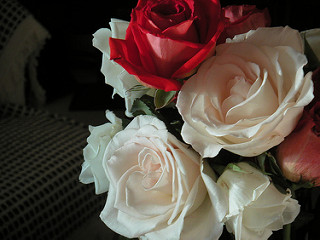

In [12]:
PIL.Image.open(str(roses[1]))

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [17]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [19]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [20]:
img.shape

(240, 179, 3)

In [21]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [23]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
len(X_test)

918

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
#Overfitted Model
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 11s 35ms/step - loss: 1.4156 - accuracy: 0.3953
Epoch 2/30
86/86 [==============================] - 3s 35ms/step - loss: 1.0311 - accuracy: 0.5941
Epoch 3/30
86/86 [==============================] - 3s 35ms/step - loss: 0.8512 - accuracy: 0.6781
Epoch 4/30
86/86 [==============================] - 3s 35ms/step - loss: 0.6923 - accuracy: 0.7420
Epoch 5/30
86/86 [==============================] - 3s 35ms/step - loss: 0.4881 - accuracy: 0.8223
Epoch 6/30
86/86 [==============================] - 3s 34ms/step - loss: 0.3024 - accuracy: 0.8993
Epoch 7/30
86/86 [==============================] - 3s 34ms/step - loss: 0.1809 - accuracy: 0.9444
Epoch 8/30
86/86 [==============================] - 3s 34ms/step - loss: 0.1450 - accuracy: 0.9571
Epoch 9/30
86/86 [==============================] - 3s 34ms/step - loss: 0.0804 - accuracy: 0.9782
Epoch 10/30
86/86 [==============================] - 3s 34ms/step - loss: 0.0384 - accuracy: 0.9920
Epoch 11

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 44ms/step - loss: 2.6881 - accuracy: 0.6547


[2.6880505084991455, 0.6546840667724609]

In [32]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 17ms/step


array([[  1.914311  ,  32.0148    ,   2.1577153 , -14.2690735 ,
        -14.880319  ],
       [ 13.557     ,   2.3593729 ,  -2.8201876 ,  -9.923811  ,
          9.053849  ],
       [ -1.6860825 ,   3.096039  ,  13.554792  , -12.429454  ,
         -1.1535671 ],
       ...,
       [ -1.1228541 ,  -0.64500743,  -3.589507  ,   7.19604   ,
          3.6044025 ],
       [  5.250349  ,  10.306381  ,  -3.6289427 ,  -2.7255538 ,
         -1.472203  ],
       [  0.62281257,  -8.535868  ,  -1.6377918 ,   9.891167  ,
          6.3378897 ]], dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)

1

In [46]:
y_test[0]

1

In [47]:
img_height=180
img_width=180

In [51]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

SyntaxError: invalid syntax (1720937801.py, line 4)

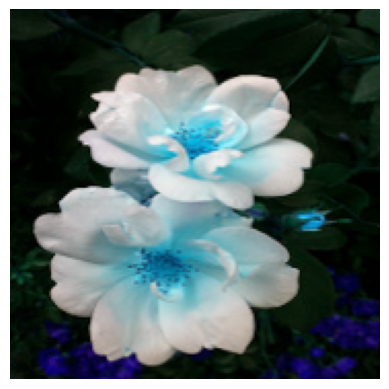

In [49]:
plt.axis('off')
plt.imshow(X[0])

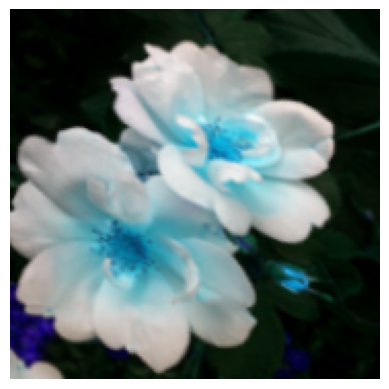

In [55]:
plt.axis('off')
plt.imshow(data_augmentation(X[:1])[0].numpy().astype("uint8"))

In [56]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

Epoch 1/30
86/86 [==============================] - 19s 177ms/step - loss: 1.3299 - accuracy: 0.4408
Epoch 2/30
86/86 [==============================] - 15s 176ms/step - loss: 1.0400 - accuracy: 0.5890
Epoch 3/30
86/86 [==============================] - 16s 185ms/step - loss: 0.9418 - accuracy: 0.6352
Epoch 4/30
86/86 [==============================] - 16s 180ms/step - loss: 0.8712 - accuracy: 0.6599
Epoch 5/30
86/86 [==============================] - 15s 175ms/step - loss: 0.7999 - accuracy: 0.6875
Epoch 6/30
86/86 [==============================] - 16s 188ms/step - loss: 0.7219 - accuracy: 0.7111
Epoch 7/30
86/86 [==============================] - 16s 185ms/step - loss: 0.7158 - accuracy: 0.7217
Epoch 8/30
86/86 [==============================] - 15s 178ms/step - loss: 0.6552 - accuracy: 0.7409
Epoch 9/30
86/86 [==============================] - 15s 178ms/step - loss: 0.5970 - accuracy: 0.7707
Epoch 10/30
86/86 [==============================] - 15s 178ms/step - loss: 0.5808 - accura

In [61]:
#i used CPU because my GPU is totally occupied and its showing internal error due to resource exhaustion 
with tf.device('/CPU:0'):
    model.evaluate(X_test_scaled, y_test, batch_size=32)

29/29 [==============================] - 4s 106ms/step - loss: 1.3925 - accuracy: 0.7222
